<a href="https://colab.research.google.com/github/MohsinAli08000/WHO-COVID-19-Global-Data-Analysis---EDA-Insights/blob/main/WHO_COVID_19_Global_Data_Analysis_EDA_%26_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#simple Linear Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df=pd.read_csv('/content/WHO-COVID-19-global-daily-data.csv')

In [ ]:
df.shape

(437280, 8)

In [ ]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-04,AF,Afghanistan,EMR,NaN,0,NaN,0
1,2020-01-04,AU,Australia,WPR,0.0,0,0.0,0
2,2020-01-04,AT,Austria,EUR,NaN,0,NaN,0
3,2020-01-04,BI,Burundi,AFR,NaN,0,NaN,0
4,2020-01-04,BR,Brazil,AMR,NaN,0,NaN,0


In [ ]:
df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,2.077770e+05,4.372800e+05,208714.000000,4.372800e+05
mean,3.740195e+03,1.902056e+06,33.921658,2.073715e+04
std,4.885997e+04,8.121120e+06,209.046744,8.401798e+04
min,-6.507900e+04,0.000000e+00,-3520.000000,0.000000e+00
25%,3.000000e+00,5.393000e+03,0.000000,3.400000e+01
50%,6.200000e+01,5.093300e+04,0.000000,6.490000e+02
75%,6.900000e+02,5.968220e+05,7.000000,7.475000e+03
max,6.966046e+06,1.034368e+08,44047.000000,1.210707e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437280 entries, 0 to 437279
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_reported      437280 non-null  object 
 1   Country_code       435458 non-null  object 
 2   Country            437280 non-null  object 
 3   WHO_region         437280 non-null  object 
 4   New_cases          207777 non-null  float64
 5   Cumulative_cases   437280 non-null  int64  
 6   New_deaths         208714 non-null  float64
 7   Cumulative_deaths  437280 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 26.7+ MB


In [ ]:
df_clean = df[['Cumulative_cases', 'Cumulative_deaths']].dropna()
df_clean['Cumulative_cases'] = df_clean['Cumulative_cases'].fillna(df_clean['Cumulative_cases'].mean())
df_clean['Cumulative_deaths'] = df_clean['Cumulative_deaths'].fillna(df_clean['Cumulative_deaths'].mode()[0])
X = df_clean[['Cumulative_cases']]
y = df_clean['Cumulative_deaths']

In [ ]:
df_clean.isnull().sum()

,0
Cumulative_cases,0
Cumulative_deaths,0


In [ ]:
#Split into training and Testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
#Evaluate the model
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)


In [ ]:
print('Mean Absolute Error:',mae)
print('Mean Squared Error:',mse)
print('Root Mean Squared Error:',rmse)
print('R-squared:',r2)

Mean Absolute Error: 15745.680796668817
Mean Squared Error: 2697514736.613489
Root Mean Squared Error: 51937.604263322435
R-squared: 0.6226186520627282


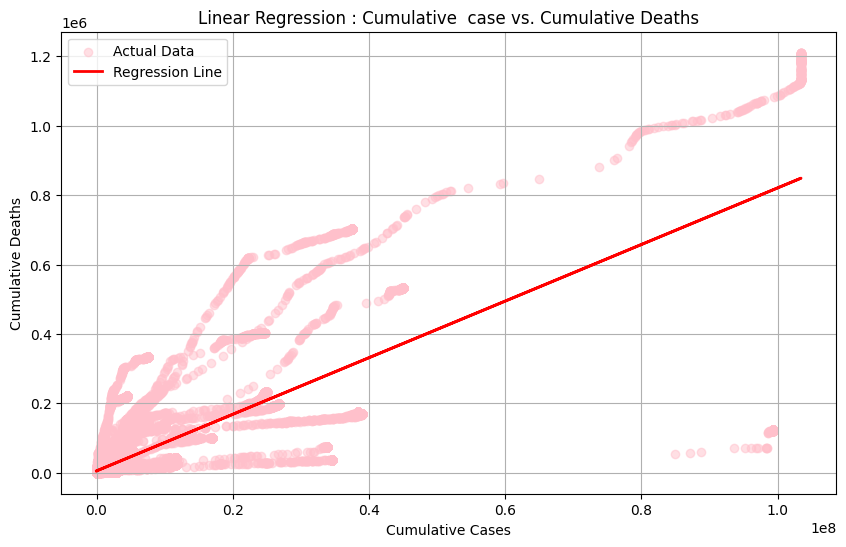

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x_test,y_test,color='pink',label='Actual Data', alpha=0.5)
plt.plot(x_test,y_pred,color='red',linewidth=2,label='Regression Line')
plt.xlabel('Cumulative Cases')
plt.ylabel('Cumulative Deaths')
plt.title('Linear Regression : Cumulative  case vs. Cumulative Deaths')
plt.grid()
plt.legend()
plt.show()

,0
Date_reported,0
Country_code,1822
Country,0
WHO_region,0
New_cases,229503
Cumulative_cases,0
New_deaths,228566
Cumulative_deaths,0
